# ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS

Predição de densidade usando volume de mistura da partícula 1.

**Objetivo:** Implementar regressão linear simples para predição da densidade de nanofluidos híbridos.

## 1. Importação das Bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS")
print("="*70)

ANÁLISE DE REGRESSÃO LINEAR SIMPLES - NANOFLUIDOS HÍBRIDOS


## 2. Carregamento e Exploração dos Dados

In [33]:
print("\nCARREGANDO DADOS...")

# Carregamento do dataset
try:
    df = pd.read_csv("dataset/Density_Prediction_Dataset.csv")
    print(f"Dataset carregado com sucesso!")
    print(f"Dimensões: {df.shape[0]} amostras x {df.shape[1]} variáveis")
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome do arquivo.")
    raise

# Exploração inicial
print(f"\nINFORMAÇÕES BÁSICAS DO DATASET:")
print(f"   • Total de amostras: {len(df)}")
print(f"   • Colunas disponíveis: {list(df.columns)}")
print(f"   • Valores nulos: {df.isnull().sum().sum()}")

# Mostrar primeiras linhas
print(f"\nPRIMEIRAS 5 LINHAS DO DATASET:")
display(df.head())


CARREGANDO DADOS...
Dataset carregado com sucesso!
Dimensões: 436 amostras x 10 variáveis

INFORMAÇÕES BÁSICAS DO DATASET:
   • Total de amostras: 436
   • Colunas disponíveis: ['Nano Particle', 'Base Fluid', 'Temperature (°C)', 'Volume Concentration (ϕ)', 'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)', 'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1', 'Volume Mixture of Particle 2', 'Density (ρ)']
   • Valores nulos: 0

PRIMEIRAS 5 LINHAS DO DATASET:


,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


In [34]:
# Estatísticas descritivas das variáveis principais
print(f"\nESTATÍSTICAS DESCRITIVAS:")
cols_interesse = ["Volume Mixture of Particle 1", "Density (ρ)"]
display(df[cols_interesse].describe().round(4))


ESTATÍSTICAS DESCRITIVAS:


,Volume Mixture of Particle 1,Density (ρ)
count,436.0000,436.0000
mean,57.5229,1016.3673
std,28.0187,22.6950
min,17.0000,983.0100
25%,20.0000,998.6873
50%,80.0000,1010.3191
75%,80.0000,1028.1730
max,80.0000,1093.4320


## 3. ETAPA 1: Seleção das Variáveis

Seleção das colunas para regressão linear simples:  
**X (independente):** Volume Mixture of Particle 1  
**Y (dependente):** Density (ρ)

In [35]:
print("ETAPA 1: SELEÇÃO DAS VARIÁVEIS")
print("="*50)

# Seleção das colunas específicas
X = df["Volume Mixture of Particle 1"].values
Y = df["Density (ρ)"].values

print(f"Variável X (independente): Volume Mixture of Particle 1")
print(f"Variável Y (dependente): Density (ρ)")
print(f"Número de observações: {len(X)}")

# Verificar valores válidos
mask_validos = ~(np.isnan(X) | np.isnan(Y))
X = X[mask_validos]
Y = Y[mask_validos]
print(f"Observações válidas (sem NaN): {len(X)}")

# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nDivisão dos dados:")
print(f"Treino: {len(X_train)} amostras (70%)")
print(f"Teste: {len(X_test)} amostras (30%)")

ETAPA 1: SELEÇÃO DAS VARIÁVEIS
Variável X (independente): Volume Mixture of Particle 1
Variável Y (dependente): Density (ρ)
Número de observações: 436
Observações válidas (sem NaN): 436

Divisão dos dados:
Treino: 305 amostras (70%)
Teste: 131 amostras (30%)


## 4. ETAPA 2: Cálculos da Regressão Linear

Aplicação das fórmulas da regressão linear simples conforme especificado.

In [36]:
print("ETAPA 2: CÁLCULOS DA REGRESSÃO LINEAR")
print("="*50)

# Cálculo das médias
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

print(f"Médias:")
print(f"x̄ = {x_mean:.4f}")
print(f"ȳ = {y_mean:.4f}")

ETAPA 2: CÁLCULOS DA REGRESSÃO LINEAR
Médias:
x̄ = 58.8164
ȳ = 1014.7974


In [37]:
# PARTE 1: Cálculo dos coeficientes
print("\n--- PARTE 1: Coeficientes da Regressão ---")

# Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
numerador_b1 = np.sum((X_train - x_mean) * (y_train - y_mean))
denominador_b1 = np.sum((X_train - x_mean)**2)
b1 = numerador_b1 / denominador_b1

print(f"b₁ (Coeficiente angular/slope):")
print(f"  Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²")
print(f"  b₁ = {b1:.6f}")

# Fórmula: b₀ = ȳ - b₁x̄
b0 = y_mean - b1 * x_mean
print(f"\nb₀ (Coeficiente linear/intercepto):")
print(f"  Fórmula: b₀ = ȳ - b₁x̄")
print(f"  b₀ = {b0:.6f}")

# Equação da reta de regressão: ŷ = b₁x + b₀
print(f"\nEquação da reta de regressão:")
print(f"  ŷ = {b1:.6f}x + {b0:.6f}")

# Predições no conjunto de teste
y_pred = b1 * X_test + b0
print(f"\nPredições realizadas para {len(X_test)} amostras de teste")


--- PARTE 1: Coeficientes da Regressão ---
b₁ (Coeficiente angular/slope):
  Fórmula: b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
  b₁ = 0.050748

b₀ (Coeficiente linear/intercepto):
  Fórmula: b₀ = ȳ - b₁x̄
  b₀ = 1011.812594

Equação da reta de regressão:
  ŷ = 0.050748x + 1011.812594

Predições realizadas para 131 amostras de teste


## 5. Cálculo das Métricas de Erro

In [38]:
print("--- PARTE 2: Soma dos Quadrados dos Erros (SSE/RSS) ---")

# Fórmula: SSE = Σ(yᵢ - ŷᵢ)²
SSE = np.sum((y_test - y_pred)**2)
print(f"SSE (Soma dos quadrados dos erros):")
print(f"  Fórmula: SSE = Σ(yᵢ - ŷᵢ)²")
print(f"  SSE = {SSE:.6f}")

print(f"\n--- PARTE 3: Métricas de Erro ---")

# Fórmula: MSE = (1/n) * SSE
n_test = len(y_test)
MSE = SSE / n_test
print(f"MSE (Erro médio quadrático):")
print(f"  Fórmula: MSE = (1/n) * SSE")
print(f"  MSE = {MSE:.6f}")

# Fórmula: RMSE = √MSE
RMSE = np.sqrt(MSE)
print(f"RMSE (Raiz do erro médio quadrático):")
print(f"  Fórmula: RMSE = √MSE")
print(f"  RMSE = {RMSE:.6f}")

# Cálculo adicional do R² para avaliação
TSS = np.sum((y_test - np.mean(y_test))**2)
R_squared = 1 - (SSE / TSS)
print(f"\nMétrica adicional:")
print(f"R² (Coeficiente de determinação) = {R_squared:.6f}")

--- PARTE 2: Soma dos Quadrados dos Erros (SSE/RSS) ---
SSE (Soma dos quadrados dos erros):
  Fórmula: SSE = Σ(yᵢ - ŷᵢ)²
  SSE = 93082.782339

--- PARTE 3: Métricas de Erro ---
MSE (Erro médio quadrático):
  Fórmula: MSE = (1/n) * SSE
  MSE = 710.555590
RMSE (Raiz do erro médio quadrático):
  Fórmula: RMSE = √MSE
  RMSE = 26.656249

Métrica adicional:
R² (Coeficiente de determinação) = -0.068499


## 6. Resumo dos Resultados

In [39]:
print("RESUMO DOS RESULTADOS")
print("="*50)
print(f"{'Métrica':<30} {'Valor':<15}")
print("-"*50)
print(f"{'Coeficiente Angular (b₁)':<30} {b1:.6f}")
print(f"{'Intercepto (b₀)':<30} {b0:.6f}")
print(f"{'SSE (Soma Quad. Erros)':<30} {SSE:.6f}")
print(f"{'MSE (Erro Médio Quad.)':<30} {MSE:.6f}")
print(f"{'RMSE (Raiz MSE)':<30} {RMSE:.6f}")
print(f"{'R² (Coef. Determinação)':<30} {R_squared:.6f}")

print(f"\nEquação Final:")
print(f"ŷ = {b1:.6f}x + {b0:.6f}")

RESUMO DOS RESULTADOS
Métrica                        Valor          
--------------------------------------------------
Coeficiente Angular (b₁)       0.050748
Intercepto (b₀)                1011.812594
SSE (Soma Quad. Erros)         93082.782339
MSE (Erro Médio Quad.)         710.555590
RMSE (Raiz MSE)                26.656249
R² (Coef. Determinação)        -0.068499

Equação Final:
ŷ = 0.050748x + 1011.812594


## 7. Visualizações dos Resultados

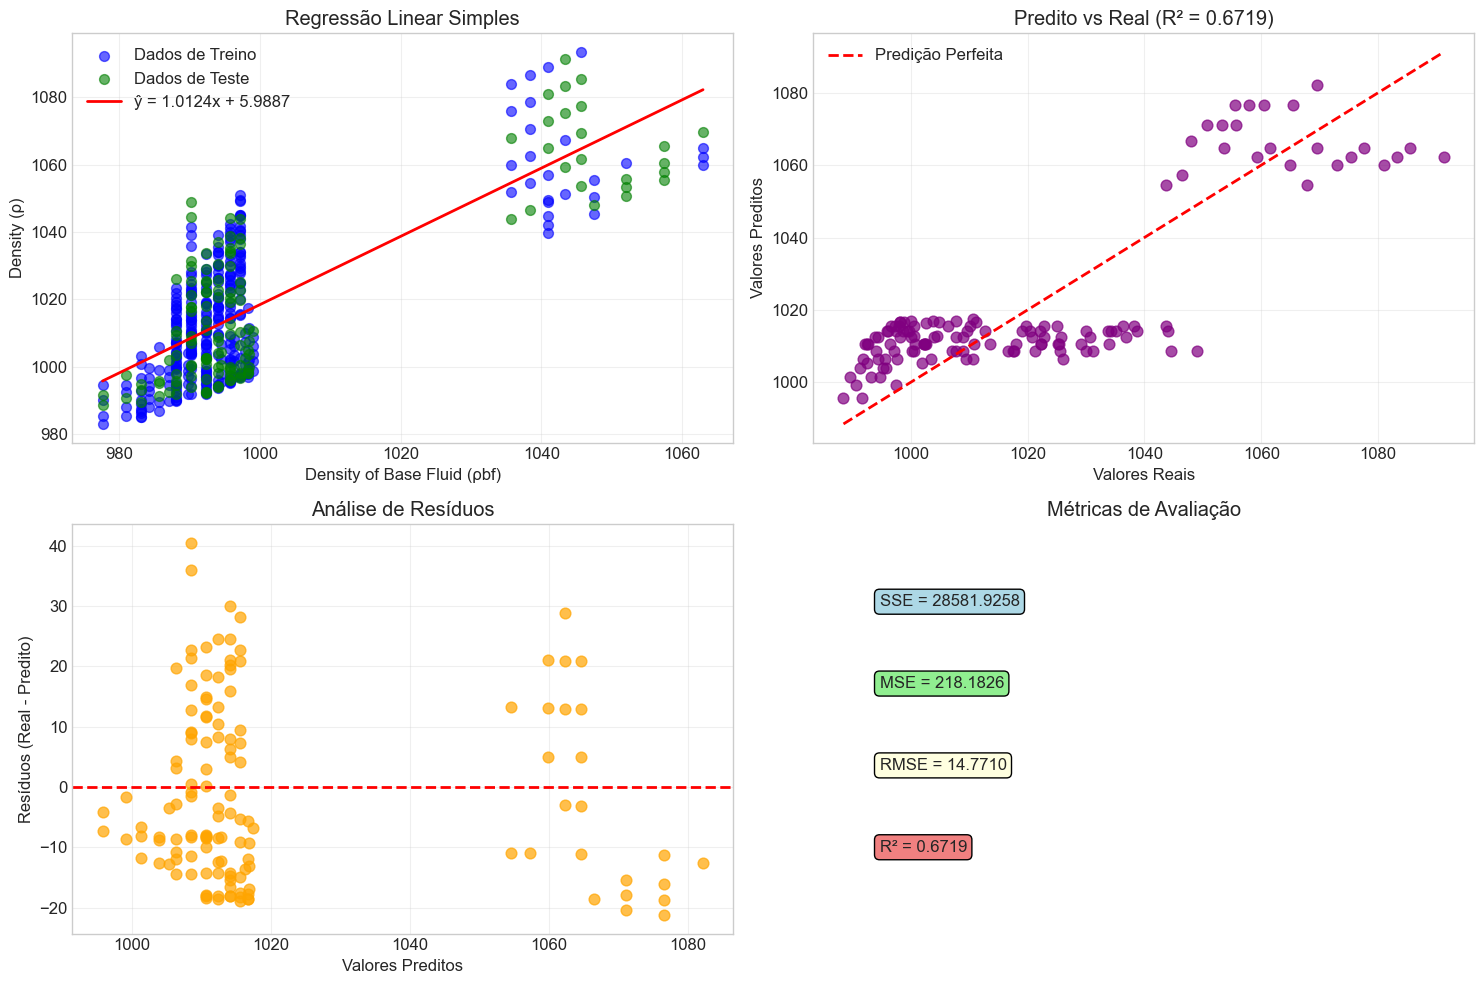

In [ ]:
# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Dispersão + Linha de Regressão
axes[0,0].scatter(X_train, y_train, alpha=0.6, color='blue', s=50, label='Dados de Treino')
axes[0,0].scatter(X_test, y_test, alpha=0.6, color='green', s=50, label='Dados de Teste')

# Linha de regressão
x_linha = np.linspace(X.min(), X.max(), 100)
y_linha = b1 * x_linha + b0
axes[0,0].plot(x_linha, y_linha, color='red', linewidth=2, 
               label=f'ŷ = {b1:.4f}x + {b0:.4f}')

axes[0,0].set_xlabel('Volume Mixture of Particle 1')
axes[0,0].set_ylabel('Density (ρ)')
axes[0,0].set_title('Regressão Linear Simples')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Predito vs Real
axes[0,1].scatter(y_test, y_pred, alpha=0.7, color='purple', s=60)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
               label='Predição Perfeita')
axes[0,1].set_xlabel('Valores Reais')
axes[0,1].set_ylabel('Valores Preditos')
axes[0,1].set_title(f'Predito vs Real (R² = {R_squared:.4f})')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Análise de Resíduos
residuos = y_test - y_pred
axes[1,0].scatter(y_pred, residuos, alpha=0.7, color='orange', s=60)
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Valores Preditos')
axes[1,0].set_ylabel('Resíduos (Real - Predito)')
axes[1,0].set_title('Análise de Resíduos')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Métricas de Erro
axes[1,1].text(0.1, 0.8, f'SSE = {SSE:.4f}', fontsize=12, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
axes[1,1].text(0.1, 0.6, f'MSE = {MSE:.4f}', fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
axes[1,1].text(0.1, 0.4, f'RMSE = {RMSE:.4f}', fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
axes[1,1].text(0.1, 0.2, f'R² = {R_squared:.4f}', fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
axes[1,1].set_title('Métricas de Avaliação')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

## 8. Interpretação dos Resultados

In [ ]:
print("INTERPRETAÇÃO DOS RESULTADOS")
print("="*50)

print(f"\nCoeficientes da Regressão:")
print(f"• b₁ = {b1:.6f}: Para cada unidade de aumento no volume")
print(f"  de mistura da partícula 1, a densidade do nanofluido aumenta {b1:.6f} unidades")
print(f"• b₀ = {b0:.6f}: Valor estimado da densidade quando volume = 0")

print(f"\nMétricas de Erro:")
print(f"• SSE = {SSE:.6f}: Soma total dos quadrados dos erros")
print(f"• MSE = {MSE:.6f}: Erro quadrático médio")
print(f"• RMSE = {RMSE:.6f}: Erro médio em unidades originais")

print(f"\nQualidade do Modelo:")
if R_squared >= 0.8:
    qualidade = "Excelente"
elif R_squared >= 0.6:
    qualidade = "Boa"
elif R_squared >= 0.4:
    qualidade = "Moderada"
else:
    qualidade = "Fraca"

print(f"• R² = {R_squared:.4f} ({qualidade})")
print(f"• O modelo explica {R_squared*100:.2f}% da variabilidade dos dados")

print(f"\nFórmulas Aplicadas:")
print(f"1. b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²")
print(f"2. b₀ = ȳ - b₁x̄")
print(f"3. ŷ = b₁x + b₀")
print(f"4. SSE = Σ(yᵢ - ŷᵢ)²")
print(f"5. MSE = (1/n) × SSE")
print(f"6. RMSE = √MSE")

print(f"\nEquação Final: ŷ = {b1:.6f}x + {b0:.6f}")

INTERPRETAÇÃO DOS RESULTADOS

Coeficientes da Regressão:
• b₁ = 1.012449: Para cada unidade de aumento na densidade
  do fluido base, a densidade do nanofluido aumenta 1.012449 unidades
• b₀ = 5.988745: Valor estimado da densidade quando ρbf = 0

Métricas de Erro:
• SSE = 28581.925790: Soma total dos quadrados dos erros
• MSE = 218.182640: Erro quadrático médio
• RMSE = 14.771007: Erro médio em unidades originais

Qualidade do Modelo:
• R² = 0.6719 (Boa)
• O modelo explica 67.19% da variabilidade dos dados

Fórmulas Aplicadas:
1. b₁ = Σ(xᵢ-x̄)(yᵢ-ȳ) / Σ(xᵢ-x̄)²
2. b₀ = ȳ - b₁x̄
3. ŷ = b₁x + b₀
4. SSE = Σ(yᵢ - ŷᵢ)²
5. MSE = (1/n) × SSE
6. RMSE = √MSE

Equação Final: ŷ = 1.012449x + 5.988745
